In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Automobile_data.csv")

# Replace "?" with NaN
df.replace("?", pd.NA, inplace=True)

# Convert numeric-looking columns to proper numeric types
cols_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Check missing values
missing_counts = df.isna().sum()
print("Missing values per column:\n")
print(missing_counts[missing_counts > 0])


Missing values per column:

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [2]:
# Drop rows with missing target variable 'price'
df.dropna(subset=['price'], inplace=True)

# Fill missing numeric columns with median
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill missing with mode
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)


<ipython-input-2-8f55482334d0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-2-8f55482334d0>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

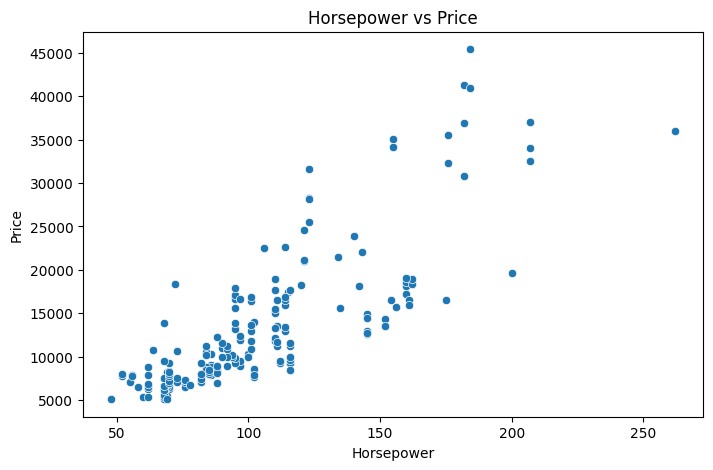

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scatter Plot: Horsepower vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='horsepower', y='price')
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

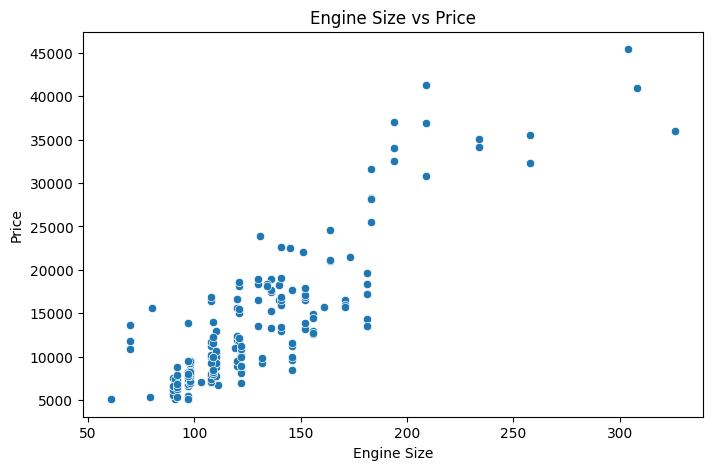

In [4]:
# 2. Scatter Plot: Engine Size vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='engine-size', y='price')
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

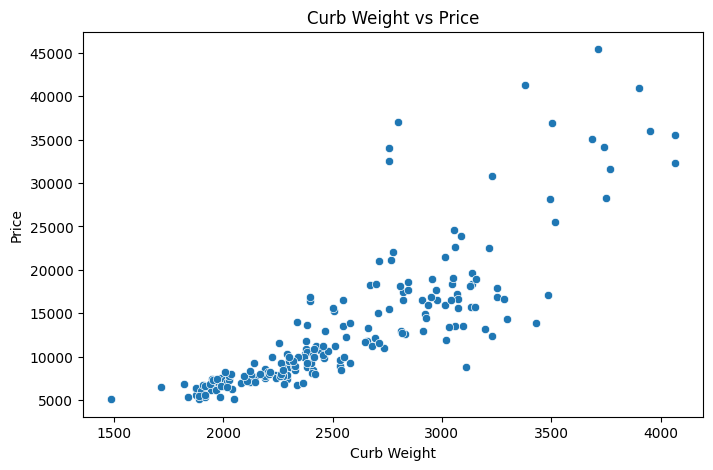

In [5]:
# 3. Scatter Plot: Curb Weight vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='curb-weight', y='price')
plt.title('Curb Weight vs Price')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.show()


In [6]:
# Compute correlation matrix (numeric only)
corr_matrix = df.corr(numeric_only=True)

# Correlation with price
price_corr = corr_matrix['price'].sort_values(ascending=False)

print("Top correlations with Price:\n")
print(price_corr)


Top correlations with Price:

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.810500
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543158
height               0.135486
normalized-losses    0.094366
stroke               0.082209
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.102310
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64


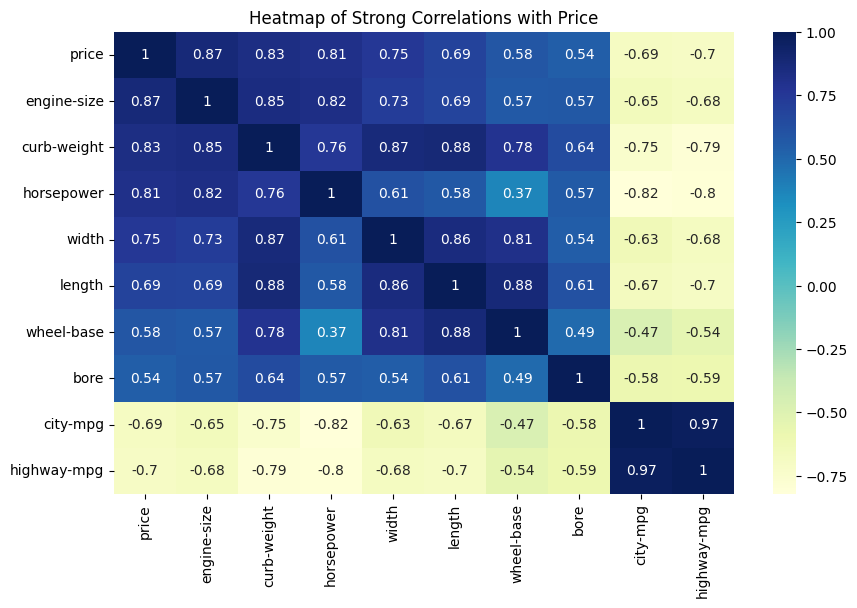

In [7]:
# Select features with strong correlation to price
strong_corr_features = price_corr[abs(price_corr) > 0.5].index.tolist()

# Plot heatmap of those features
plt.figure(figsize=(10, 6))
sns.heatmap(df[strong_corr_features].corr(), annot=True, cmap='YlGnBu')
plt.title('Heatmap of Strong Correlations with Price')
plt.show()
